# In this assignment, you will implement the PCA and the k-means algorithm
### 100 points total

In [3]:
# clear all variables
%reset_selective -f a
#import 
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import time
import pandas as pd

## Load data from data.csv file (5 Points)


In [13]:
# Complete the function below to load the data from data.csv. 
# Return X where X is a 1000 by 500 (m=1000 and d=500. d is the number of features)
# 
def load_data(file_name):
    # write your code here
    X= np.loadtxt(file_name, delimiter=',')
    return X

In [35]:
X = load_data("data-1.csv")

# Before clustering the data, implement PCA to reduce the dimensionality from 500 to 2.

## Preprocess the data (5 Points)

In [15]:
# perform any preprocessing steps in the function below.
def pre_process(X):
    # write your code here
    X = (X - X.mean(axis = 0)) / (X.std(axis = 0))
    return X

## Implement PCA to reduce the dimensionality to 2 (30 points if from scratch, 10 points if using a PCA function from a library)

In [16]:
# the below function takes X as (m by 500) and return it as (m by 2) after performing PCA. 
# If implementing from scratch, you can use functions from numpy and numpy.linalg etc
def my_PCA(X, dim = 2):
    # write your code here
    
    ## calculate Covariance matrix
    cor_matrix = np.cov(X, rowvar = False)
    
    ## split to eigenvalues and eigen vector
    eig_val, eig_vec = np.linalg.eig(cor_matrix)
    
    ## sorting the PCA components
    order_pca = np.argsort(eig_val)[::-1]
    eig_val ,eig_vec = eig_val[order_pca], eig_vec[:,order_pca]
    
    # transform the original data 
    X_2d = np.matmul(X, eig_vec[:,:dim])   
    
    return X_2d    

The Shape of dataset after reduce the dimensionality by PCA: (1000, 2)


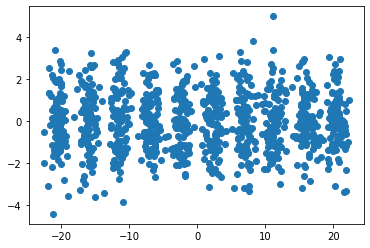

In [32]:
X = pre_process(X)
X_2d = my_PCA(X)
# check out the shape and scatter plot the points
print(f"The Shape of dataset after reduce the dimensionality by PCA: {X_2d.shape}")
plt.scatter(X_2d[:,0],X_2d[:,1])

# K-means

## Start by implementing a function that randomly initialises centroids (5 points).

In [18]:
#input:
#k: number of centers
#X: the data
# return
# centroids is a k by 2 
def initialise_centroids(X,k):    
    np.random.seed(1311)
    nrow = np.random.choice(len(X), size = k, replace=False)
    centroids = X[nrow,:]
    return centroids

The Shape of initialise centriods: (10, 2)


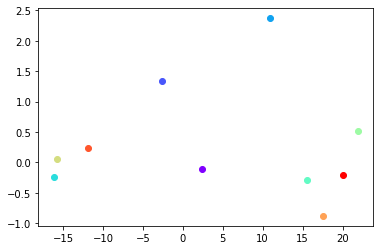

In [36]:
centroids = initialise_centroids(X_2d,10)
print(f"The Shape of initialise centriods: {centroids.shape}")

# the code below will plot the centroids
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for c in centroids:
    plt.scatter(c[0], c[1], color=next(colors))

## Implement a function that takes the matrix X and a set of centroids and assigns each point in X to a cluster (5 points)

In [20]:
from scipy.spatial.distance import cdist
#input
# X is a m by 2 point 
# centroids is a k by 2 , the center of k clusters.
#return cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
def assign(X,centroids):
    cluster_assignments = np.argmin(cdist(X, centroids),axis = 1)
    return cluster_assignments

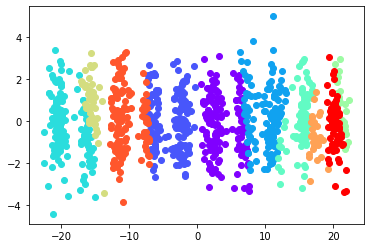

In [38]:
cluster_assignments = assign(X_2d,centroids)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))

## Next, implement a function to compute the value of a cost function given a set of centroids and assignments (10 points)

In [39]:
def cost(X,cluster_assignments,centroids):
    
    cost = np.zeros(X.shape[0])
    
    # calculate cost for each centriods
    for i in range(centroids.shape[0]):
        cost[cluster_assignments == i] = np.linalg.norm(X[cluster_assignments == i] - centroids[i], axis = 1)
    cost = np.sum(np.square(cost))
    return cost

In [40]:
# the code below tests your functions
k=10
centroids = initialise_centroids(X_2d,k)
cluster_assignments = assign(X_2d,centroids)
c = cost(X_2d,cluster_assignments,centroids)
print(f"The Testing Cost Function: {c}")

The Testing Cost Function: 8183.408748662289


## Implement a function to perform the k-means algorithm using the functions you implemented above (40 points, 10 if you use a kmean function from a library)

In [41]:
def My_Kmeans(X,k,num_of_iterations):
    
    # initiaize the centriods
    centroids = initialise_centroids(X,k)
    
    #- iteration: conditions
    cost_func = np.Inf
    cost_func_previous = 0
    iterations = 0
    
    #- iteration: optimize the cost function
    while iterations <= num_of_iterations:
        
        # assign the centriod for each data point
        cluster_assignments = assign(X,centroids)
        
        # compute the new centriods for each cluster
        centroids = np.zeros((k, X.shape[1]))
        for i in range(k):
            centroids[i, :] = np.mean(X[cluster_assignments == i, :], axis=0)
        
        # assign the previous cost function
        cost_func_previous = cost_func
        
        # calculate cost function
        cost_func = cost(X,cluster_assignments,centroids)
        
        # iteration: break point
        if abs(cost_func - cost_func_previous) <= 1e-4: # if the cost function become fix value, the model was optimized
            break
        
        iterations += 1
    
    return cluster_assignments , centroids
 

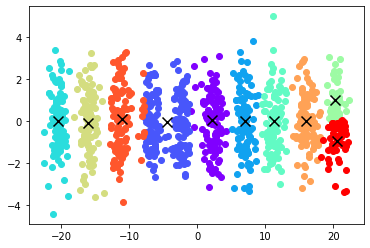

In [45]:
k = 10
centroids = []
cluster_assignments , centroids = My_Kmeans(X_2d,k,1000)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

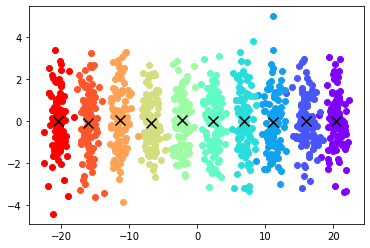

In [43]:
k = 10
cluster_assignments = load_data("True_clusters_IDs.csv")
centroids = []
for idx in range(k):            
    temp_cent = X_2d[cluster_assignments==idx].mean(axis=0)             
    centroids.append(temp_cent)
            
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in range(k):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')